<a href="https://colab.research.google.com/github/Purvak08/Data-Analysis-Projects/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the drive to load the dataset from Google drive

from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/MidCourseAssignments/Superstore Marketing Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data = pd.read_csv(file_path)
data

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [ ]:
# Handling missing values
# we will impute missing values in the 'Income' column with the median.
median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)

In [ ]:
# Verify that missing values are handled
missing_values_after = data.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_after)

Missing Values After Handling:
Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64


In [ ]:
# Check data types
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object


In [ ]:
# Replace '########' with NaN
data['Dt_Customer'] = data['Dt_Customer'].replace('########', pd.NA)

In [ ]:
# Data type conversions
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])  # Convert 'Dt_Customer' to datetime

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:

income = data['Income']

# Calculate mean, median, and mode
mean_income = income.mean()
median_income = income.median()
mode_income = income.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_income = income.var()
std_deviation_income = income.std()

# Print the results
print(f"Mean Income: {mean_income:.2f}")
print(f"Median Income: {median_income:.2f}")
print(f"Mode Income: {mode_income:.2f}")
print(f"Variance of Income: {variance_income:.2f}")
print(f"Standard Deviation of Income: {std_deviation_income:.2f}")

from scipy import stats

# Identify and handle outliers (e.g., using z-scores)
z_scores = np.abs(stats.zscore(income))
threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers = income[z_scores > threshold]

# Print the count of outliers and the updated dataset size
print(f"Number of Outliers: {len(outliers)}")
print(f"Dataset size after removing outliers: {data.shape[0]} rows")

Mean Income: 52237.98
Median Income: 51381.50
Mode Income: 51381.50
Variance of Income: 626899235.18
Standard Deviation of Income: 25037.96
Number of Outliers: 8
Dataset size after removing outliers: 2240 rows


In [ ]:

age = data['Year_Birth']

# Calculate mean, median, and mode
mean_age = age.mean()
median_age = age.median()
mode_age = age.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_age = age.var()
std_deviation_age = age.std()

# Print the results
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age:.2f}")
print(f"Variance of Age: {variance_age:.2f}")
print(f"Standard Deviation of Age: {std_deviation_age:.2f}")

from scipy import stats

# Identify and handle outliers (e.g., using z-scores)
z_scores_age = np.abs(stats.zscore(age))
threshold_age = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers_age = age[z_scores_age > threshold_age]



# Print the count of outliers and the updated dataset size
print(f"Number of Age Outliers: {len(outliers_age)}")


Mean Age: 1968.81
Median Age: 1970.00
Mode Age: 1976.00
Variance of Age: 143.62
Standard Deviation of Age: 11.98
Number of Age Outliers: 3


In [ ]:

num_deals_purchases = data['NumDealsPurchases']

# Calculate mean, median, and mode
mean_num_deals_purchases = num_deals_purchases.mean()
median_num_deals_purchases = num_deals_purchases.median()
mode_num_deals_purchases = num_deals_purchases.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_num_deals_purchases = num_deals_purchases.var()
std_deviation_num_deals_purchases = num_deals_purchases.std()

# Print the results
print(f"Mean NumDealsPurchases: {mean_num_deals_purchases:.2f}")
print(f"Median NumDealsPurchases: {median_num_deals_purchases:.2f}")
print(f"Mode NumDealsPurchases: {mode_num_deals_purchases:.2f}")
print(f"Variance of NumDealsPurchases: {variance_num_deals_purchases:.2f}")
print(f"Standard Deviation of NumDealsPurchases: {std_deviation_num_deals_purchases:.2f}")

from scipy import stats

# Identify and handle outliers (e.g., using z-scores)
z_scores = np.abs(stats.zscore(num_deals_purchases))
threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers = num_deals_purchases[z_scores > threshold]


# Print the count of outliers and the updated dataset size
print(f"Number of Outliers in NumDealsPurchases: {len(outliers)}")



Mean NumDealsPurchases: 2.33
Median NumDealsPurchases: 2.00
Mode NumDealsPurchases: 1.00
Variance of NumDealsPurchases: 3.73
Standard Deviation of NumDealsPurchases: 1.93
Number of Outliers in NumDealsPurchases: 32


In [ ]:

num_catalog_purchases = data['NumCatalogPurchases']

# Calculate mean, median, and mode
mean_num_catalog_purchases = num_catalog_purchases.mean()
median_num_catalog_purchases = num_catalog_purchases.median()
mode_num_catalog_purchases = num_catalog_purchases.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_num_catalog_purchases = num_catalog_purchases.var()
std_deviation_num_catalog_purchases = num_catalog_purchases.std()

# Print the results
print(f"Mean NumCatalogPurchases: {mean_num_catalog_purchases:.2f}")
print(f"Median NumCatalogPurchases: {median_num_catalog_purchases:.2f}")
print(f"Mode NumCatalogPurchases: {mode_num_catalog_purchases:.2f}")
print(f"Variance of NumCatalogPurchases: {variance_num_catalog_purchases:.2f}")
print(f"Standard Deviation of NumCatalogPurchases: {std_deviation_num_catalog_purchases:.2f}")

from scipy import stats

# Identify and handle outliers (e.g., using z-scores)
z_scores_num_catalog_purchases = np.abs(stats.zscore(num_catalog_purchases))
threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers_num_catalog_purchases = num_catalog_purchases[z_scores_num_catalog_purchases > threshold]


# Print the count of outliers and the updated dataset size
print(f"Number of Outliers in NumCatalogPurchases: {len(outliers_num_catalog_purchases)}")


Mean NumCatalogPurchases: 2.66
Median NumCatalogPurchases: 2.00
Mode NumCatalogPurchases: 0.00
Variance of NumCatalogPurchases: 8.54
Standard Deviation of NumCatalogPurchases: 2.92
Number of Outliers in NumCatalogPurchases: 4


In [ ]:

num_store_purchases = data['NumStorePurchases']

# Calculate mean, median, and mode
mean_num_store_purchases = num_store_purchases.mean()
median_num_store_purchases = num_store_purchases.median()
mode_num_store_purchases = num_store_purchases.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_num_store_purchases = num_store_purchases.var()
std_deviation_num_store_purchases = num_store_purchases.std()

# Print the results
print(f"Mean NumStorePurchases: {mean_num_store_purchases:.2f}")
print(f"Median NumStorePurchases: {median_num_store_purchases:.2f}")
print(f"Mode NumStorePurchases: {mode_num_store_purchases:.2f}")
print(f"Variance of NumStorePurchases: {variance_num_store_purchases:.2f}")
print(f"Standard Deviation of NumStorePurchases: {std_deviation_num_store_purchases:.2f}")

from scipy import stats
import numpy as np

# Identify and handle outliers (e.g., using z-scores)
z_scores = np.abs(stats.zscore(num_store_purchases))
threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers = num_store_purchases[z_scores > threshold]

# Print the count of outliers and the updated dataset size
print(f"Number of Outliers in NumStorePurchases: {len(outliers)}")


Mean NumStorePurchases: 5.79
Median NumStorePurchases: 5.00
Mode NumStorePurchases: 3.00
Variance of NumStorePurchases: 10.57
Standard Deviation of NumStorePurchases: 3.25
Number of Outliers in NumStorePurchases: 0


In [ ]:
# Select the variable of interest (e.g., 'NumWebPurchases')
num_web_purchases = data['NumWebPurchases']

# Calculate mean, median, and mode
mean_num_web_purchases = num_web_purchases.mean()
median_num_web_purchases = num_web_purchases.median()
mode_num_web_purchases = num_web_purchases.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_num_web_purchases = num_web_purchases.var()
std_deviation_num_web_purchases = num_web_purchases.std()

# Print the results
print(f"Mean NumWebPurchases: {mean_num_web_purchases:.2f}")
print(f"Median NumWebPurchases: {median_num_web_purchases:.2f}")
print(f"Mode NumWebPurchases: {mode_num_web_purchases:.2f}")
print(f"Variance of NumWebPurchases: {variance_num_web_purchases:.2f}")
print(f"Standard Deviation of NumWebPurchases: {std_deviation_num_web_purchases:.2f}")

from scipy import stats

# Identify and handle outliers (e.g., using z-scores)
z_scores = np.abs(stats.zscore(num_web_purchases))
threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers = num_web_purchases[z_scores > threshold]



# Print the count of outliers and the updated dataset size
print(f"Number of Outliers in NumWebPurchases: {len(outliers)}")


Mean NumWebPurchases: 4.08
Median NumWebPurchases: 4.00
Mode NumWebPurchases: 2.00
Variance of NumWebPurchases: 7.72
Standard Deviation of NumWebPurchases: 2.78
Number of Outliers in NumWebPurchases: 4


In [ ]:

recency = data['Recency']

# Calculate mean, median, and mode
mean_recency = recency.mean()
median_recency = recency.median()
mode_recency = recency.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_recency = recency.var()
std_deviation_recency = recency.std()

# Print the results
print(f"Mean Recency: {mean_recency:.2f}")
print(f"Median Recency: {median_recency:.2f}")
print(f"Mode Recency: {mode_recency:.2f}")
print(f"Variance of Recency: {variance_recency:.2f}")
print(f"Standard Deviation of Recency: {std_deviation_recency:.2f}")

from scipy import stats

# Identify and handle outliers (e.g., using z-scores)
z_scores = np.abs(stats.zscore(recency))
threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers = recency[z_scores > threshold]



# Print the count of outliers and the updated dataset size
print(f"Number of Outliers in Recency: {len(outliers)}")


Mean Recency: 49.11
Median Recency: 49.00
Mode Recency: 56.00
Variance of Recency: 838.82
Standard Deviation of Recency: 28.96
Number of Outliers in Recency: 0


In [ ]:
# Select the variable of interest (e.g., 'NumWebVisitsMonth')
web_visits = data['NumWebVisitsMonth']

# Calculate mean, median, and mode
mean_web_visits = web_visits.mean()
median_web_visits = web_visits.median()
mode_web_visits = web_visits.mode().iloc[0]  # Use .iloc[0] to get the first mode (in case of multiple modes)

# Calculate variance and standard deviation
variance_web_visits = web_visits.var()
std_deviation_web_visits = web_visits.std()

# Print the results
print(f"Mean Number of Web Visits per Month: {mean_web_visits:.2f}")
print(f"Median Number of Web Visits per Month: {median_web_visits:.2f}")
print(f"Mode Number of Web Visits per Month: {mode_web_visits:.2f}")
print(f"Variance of Web Visits per Month: {variance_web_visits:.2f}")
print(f"Standard Deviation of Web Visits per Month: {std_deviation_web_visits:.2f}")

from scipy import stats

# Identify and handle outliers (e.g., using z-scores)
z_scores_web_visits = np.abs(stats.zscore(web_visits))
threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)
outliers_web_visits = web_visits[z_scores_web_visits > threshold]



# Print the count of outliers and the updated dataset size
print(f"Number of Outliers in Web Visits: {len(outliers_web_visits)}")


Mean Number of Web Visits per Month: 5.32
Median Number of Web Visits per Month: 6.00
Mode Number of Web Visits per Month: 7.00
Variance of Web Visits per Month: 5.89
Standard Deviation of Web Visits per Month: 2.43
Number of Outliers in Web Visits: 9


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [ ]:
#1 Complain (Binomial Distribution):
#Probability that a customer complains (P(Complaint = 1)) can be calculated using the binomial probability formula.

from scipy.stats import binom

# Calculate the mean (proportion) of customers who complained
p_success = data['Complain'].mean()

# Expected number of complaints (can be the same as the mean for a binary variable)
expected_complain = p_success

print(f"Probability of a customer complaining: {p_success:.4f}")
print(f"Expected number of complaints: {expected_complain:.2f}")



Probability of a customer complaining: 0.0094
Expected number of complaints: 0.01


In [ ]:
#2. NumDealsPurchases (Poisson):

from scipy.stats import poisson, binom

k = 1  # Example: Number of deals you want to calculate the probability for

# If you assume a Poisson distribution for rare events (Poisson)
lambda_deals = data['NumDealsPurchases'].mean()
probability_deals_poisson = poisson.pmf(k, lambda_deals)
expected_deals_poisson = lambda_deals

print(f"Probability of {k} deals: {probability_deals_poisson:.4f}")
print(f"Expected number of deals: {expected_deals_poisson:.2f}")


Probability of 1 deals: 0.2273
Expected number of deals: 2.33


In [ ]:
#3. Kidhome (Poisson):

from scipy.stats import poisson, binom

k = 2  # Example: Number of kids you want to calculate the probability for

# If you assume a Poisson distribution for rare events (Poisson)
lambda_deals = data['Kidhome'].mean()
probability_poisson = poisson.pmf(k, lambda_deals)
expected_poisson = lambda_deals

print(f"Probability of {k} kids at home: {probability_poisson:.4f}")
print(f"Expected number of kids at home: {expected_poisson:.2f}")


Probability of 2 kids at home: 0.0633
Expected number of kids at home: 0.44


In [ ]:
#4. Teenhome (Poisson):

from scipy.stats import poisson, binom

k = 2  # Example: Number of Teens you want to calculate the probability for

# If you assume a Poisson distribution for rare events (Poisson)
lambda_deals = data['Teenhome'].mean()
probability_poisson = poisson.pmf(k, lambda_deals)
expected_poisson = lambda_deals

print(f"Probability of {k} Teenhome at home: {probability_poisson:.4f}")
print(f"Expected number of Teenhome at home: {expected_poisson:.2f}")


Probability of 2 Teenhome at home: 0.0772
Expected number of Teenhome at home: 0.51


In [ ]:
#5. NumCatalogPurchases (Poisson):

from scipy.stats import poisson, binom

k = 4  # Example: Number of catlog purchases you want to calculate the probability for

# If you assume a Poisson distribution for rare events (Poisson)
lambda_deals = data['NumCatalogPurchases'].mean()
probability_poisson = poisson.pmf(k, lambda_deals)
expected_poisson = lambda_deals

print(f"Probability of {k} purchases from catlog: {probability_poisson:.4f}")
print(f"Expected number of purchases from catlog: {expected_poisson:.2f}")


Probability of 4 purchases from catlog: 0.1461
Expected number of purchases from catlog: 2.66


In [ ]:
#6. NumStorePurchases (Poisson):

from scipy.stats import poisson, binom

k = 10  # Example: Number of catlog purchases you want to calculate the probability for

# If you assume a Poisson distribution for rare events (Poisson)
lambda_deals = data['NumStorePurchases'].mean()
probability_poisson = poisson.pmf(k, lambda_deals)
expected_poisson = lambda_deals

print(f"Probability of {k} purchases made directly in stores: {probability_poisson:.4f}")
print(f"Expected number of purchases made directly in stores: {expected_poisson:.2f}")

Probability of 10 purchases made directly in stores: 0.0357
Expected number of purchases made directly in stores: 5.79


In [ ]:
#7. NumWebPurchases (Poisson):

from scipy.stats import poisson, binom

k = 1  # Example: Number of website purchases you want to calculate the probability for

# If you assume a Poisson distribution for rare events (Poisson)
lambda_deals = data['NumWebPurchases'].mean()
probability_poisson = poisson.pmf(k, lambda_deals)
expected_poisson = lambda_deals

print(f"Probability of {k} purchases made from website: {probability_poisson:.4f}")
print(f"Expected number of purchases made from website: {expected_poisson:.2f}")

Probability of 1 purchases made from website: 0.0687
Expected number of purchases made from website: 4.08


In [ ]:
#8. Year_Birth likely to be  normally distributed.

# Assuming 'Year_Birth' follows a normal distribution
mean_age = data['Year_Birth'].mean()
std_dev_age = data['Year_Birth'].std()

# Define age range
lower_age = 1900
upper_age = 1944

# Calculate z-scores for the lower and upper ages
z_lower = (lower_age - mean_age) / std_dev_age
z_upper = (upper_age - mean_age) / std_dev_age

# Calculate the probability that a customer's age falls within the defined range
probability_age_range = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

# Calculate the expected age
expected_age = mean_age

print(f"Probability of age between {lower_age} and {upper_age}: {probability_age_range:.4f}")
print(f"Expected Age: {expected_age:.2f}")


Probability of age between 1900 and 1944: 0.0192
Expected Age: 1968.81


Probability of spending less than $20 on fish products: 0.2885
Expected spending on fish products: 37.53


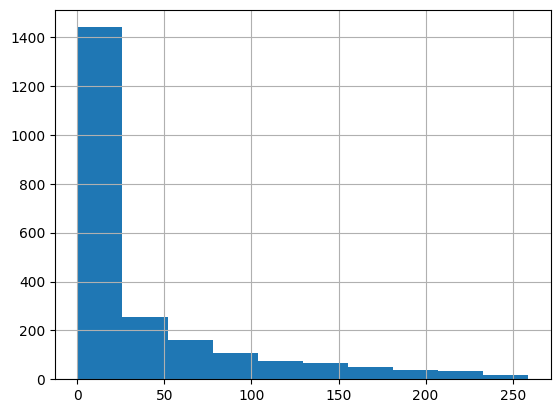

In [ ]:
#9. MntFishProducts

import scipy.stats as stats

# Assuming 'MntFishProducts' follows a right-skewed distribution (e.g., Gamma or Exponential)
data['MntFishProducts'].hist()  # Plot a histogram to visualize the distribution

# Check for skewness
skewness_fish_products = data['MntFishProducts'].skew()

if skewness_fish_products > 0:
    # Positive skew indicates right-skewed distribution
    # It might be modeled as a Gamma or Exponential distribution
    # You can choose the appropriate distribution and calculate the parameters

    # For example, if you assume it follows a Gamma distribution:
    shape_parameter = 2  # Shape parameter (adjust as needed)
    scale_parameter = data['MntFishProducts'].mean() / shape_parameter

    # Define a threshold (example)
    threshold = 20

    # Calculate the probability of spending less than 'threshold' on fish products
    probability_fish_products = stats.gamma.cdf(threshold, a=shape_parameter, scale=scale_parameter)
    expected_fish_products = shape_parameter * scale_parameter

    print(f"Probability of spending less than ${threshold} on fish products: {probability_fish_products:.4f}")
    print(f"Expected spending on fish products: {expected_fish_products:.2f}")

# You can apply a similar approach to other right-skewed variables (MntMeatProducts, MntFruits, etc.).


Probability of spending less than $150 on meat products: 0.5363
Expected spending on meat products: 166.95


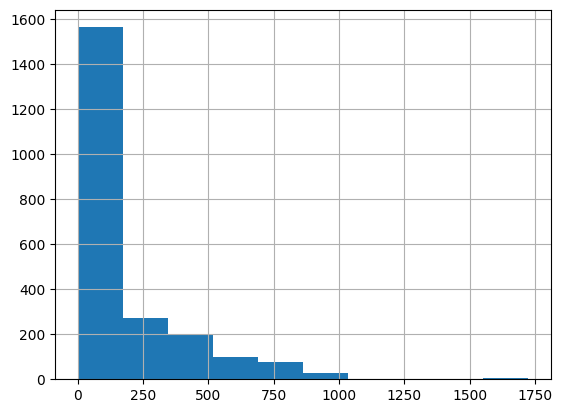

In [ ]:
#10. MntMeatProducts

import scipy.stats as stats

# Assuming 'MntMeatProducts' follows a right-skewed distribution (e.g., Gamma or Exponential)
data['MntMeatProducts'].hist()  # Plot a histogram to visualize the distribution

# Check for skewness
skewness_meat_products = data['MntMeatProducts'].skew()

if skewness_meat_products > 0:
    # Positive skew indicates a right-skewed distribution
    # It might be modeled as a Gamma or Exponential distribution
    # You can choose the appropriate distribution and calculate the parameters

    # For example, if you assume it follows a Gamma distribution:
    shape_parameter = 2  # Shape parameter (adjust as needed)
    scale_parameter = data['MntMeatProducts'].mean() / shape_parameter

    # Define a threshold (example)
    threshold = 150

    # Calculate the probability of spending less than 'threshold' on meat products
    probability_meat_products = stats.gamma.cdf(threshold, a=shape_parameter, scale=scale_parameter)
    expected_meat_products = shape_parameter * scale_parameter

    print(f"Probability of spending less than ${threshold} on meat products: {probability_meat_products:.4f}")
    print(f"Expected spending on meat products: {expected_meat_products:.2f}")


Probability of spending less than $25 on fruit products: 0.3846
Expected spending on fruit products: 37.53


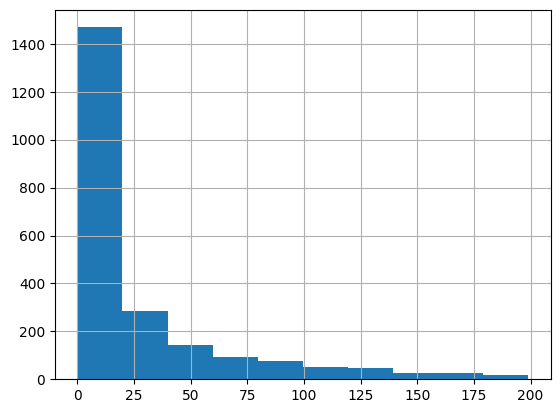

In [ ]:
#11. MntFishProducts

import scipy.stats as stats

# Assuming 'MntFruits' follows a right-skewed distribution (e.g., Gamma or Exponential)
data['MntFruits'].hist()  # Plot a histogram to visualize the distribution

# Check for skewness
skewness_fruit_products = data['MntFruits'].skew()

if skewness_fruit_products > 0:
    # Positive skew indicates right-skewed distribution
    # It might be modeled as a Gamma or Exponential distribution
    # You can choose the appropriate distribution and calculate the parameters

    # For example, if you assume it follows a Gamma distribution:
    shape_parameter = 2  # Shape parameter (adjust as needed)
    scale_parameter = data['MntFishProducts'].mean() / shape_parameter

    # Define a threshold (example)
    threshold = 25

    # Calculate the probability of spending less than 'threshold' on fish products
    probability_fruit_products = stats.gamma.cdf(threshold, a=shape_parameter, scale=scale_parameter)
    expected_fruit_products = shape_parameter * scale_parameter

    print(f"Probability of spending less than ${threshold} on fruit products: {probability_fruit_products:.4f}")
    print(f"Expected spending on fruit products: {expected_fruit_products:.2f}")

# You can apply a similar approach to other right-skewed variables (MntMeatProducts, MntFruits, etc.).


Probability of spending less than $50 on sweet products: 0.8833
Expected spending on sweet products: 27.06


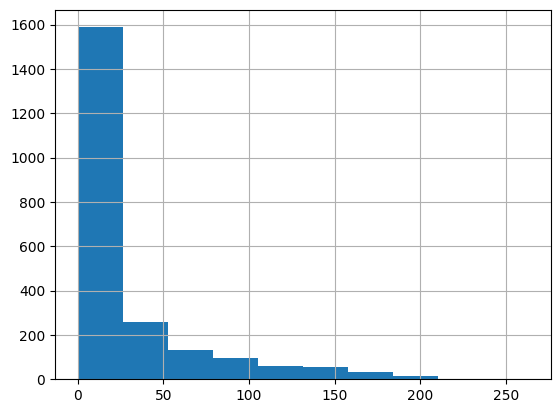

In [ ]:
#12. MntSweetProducts

import scipy.stats as stats

# Assuming 'MntSweetProducts' follows a right-skewed distribution (e.g., Gamma or Exponential)
data['MntSweetProducts'].hist()  # Plot a histogram to visualize the distribution

# Check for skewness
skewness_sweet_products = data['MntSweetProducts'].skew()

if skewness_sweet_products > 0:
    # Positive skew indicates a right-skewed distribution
    # It might be modeled as a Gamma or Exponential distribution
    # You can choose the appropriate distribution and calculate the parameters

    # For example, if you assume it follows a Gamma distribution:
    shape_parameter = 2  # Shape parameter (adjust as needed)
    scale_parameter = data['MntSweetProducts'].mean() / shape_parameter

    # Define a threshold (example)
    threshold = 50

    # Calculate the probability of spending less than 'threshold' on sweet products
    probability_sweet_products = stats.gamma.cdf(threshold, a=shape_parameter, scale=scale_parameter)
    expected_sweet_products = shape_parameter * scale_parameter

    print(f"Probability of spending less than ${threshold} on sweet products: {probability_sweet_products:.4f}")
    print(f"Expected spending on sweet products: {expected_sweet_products:.2f}")


Probability of spending less than $200 on wine products: 0.3789
Expected spending on wine products: 303.94


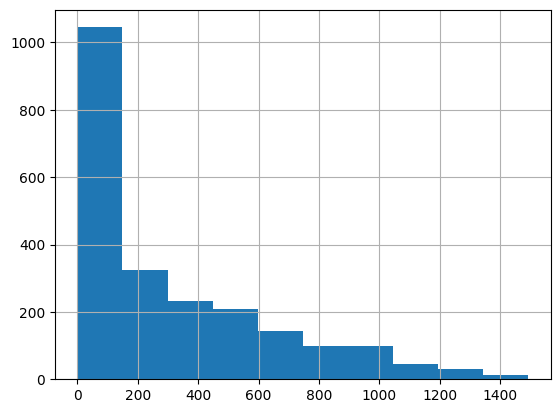

In [ ]:
#13. MntWines

import scipy.stats as stats

# Assuming 'MntWines' follows a right-skewed distribution (e.g., Gamma or Exponential)
data['MntWines'].hist()  # Plot a histogram to visualize the distribution

# Check for skewness
skewness_wines = data['MntWines'].skew()

if skewness_wines > 0:
    # Positive skew indicates a right-skewed distribution
    # It might be modeled as a Gamma or Exponential distribution
    # You can choose the appropriate distribution and calculate the parameters

    # For example, if you assume it follows a Gamma distribution:
    shape_parameter = 2  # Shape parameter (adjust as needed)
    scale_parameter = data['MntWines'].mean() / shape_parameter

    # Define a threshold (example)
    threshold = 200

    # Calculate the probability of spending less than 'threshold' on wine products
    probability_wines = stats.gamma.cdf(threshold, a=shape_parameter, scale=scale_parameter)
    expected_wines = shape_parameter * scale_parameter

    print(f"Probability of spending less than ${threshold} on wine products: {probability_wines:.4f}")
    print(f"Expected spending on wine products: {expected_wines:.2f}")

# You can adjust the parameters and apply a similar approach for other right-skewed variables.


Probability of spending less than $50 on gold products: 0.6625
Expected spending on gold products: 44.02


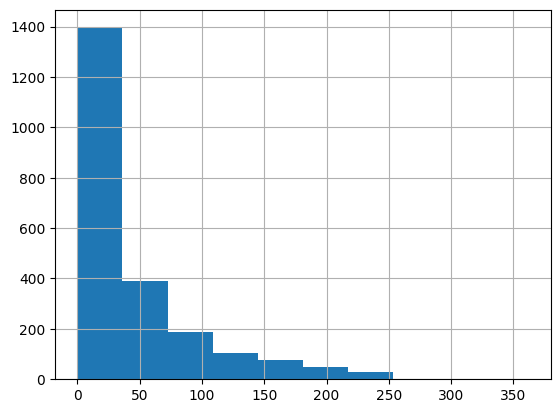

In [ ]:
#14. MntGoldProds

import scipy.stats as stats

# Assuming 'MntGoldProds' follows a right-skewed distribution (e.g., Gamma or Exponential)
data['MntGoldProds'].hist()  # Plot a histogram to visualize the distribution

# Check for skewness
skewness_gold_prods = data['MntGoldProds'].skew()

if skewness_gold_prods > 0:
    # Positive skew indicates a right-skewed distribution
    # It might be modeled as a Gamma or Exponential distribution
    # You can choose the appropriate distribution and calculate the parameters

    # For example, if you assume it follows a Gamma distribution:
    shape_parameter = 2  # Shape parameter (adjust as needed)
    scale_parameter = data['MntGoldProds'].mean() / shape_parameter

    # Define a threshold (example)
    threshold = 50

    # Calculate the probability of spending less than 'threshold' on gold products
    probability_gold_prods = stats.gamma.cdf(threshold, a=shape_parameter, scale=scale_parameter)
    expected_gold_prods = shape_parameter * scale_parameter

    print(f"Probability of spending less than ${threshold} on gold products: {probability_gold_prods:.4f}")
    print(f"Expected spending on gold products: {expected_gold_prods:.2f}")


In [ ]:
#15. NumWebVisitsMonth

from scipy.stats import poisson

# Assuming 'NumWebVisitsMonth' follows a Poisson distribution
lambda_web_visits = data['NumWebVisitsMonth'].mean()

# Define the specific number of web visits (k) for which you want to calculate the probability
k = 10  # Example: Number of web visits

# Calculate the probability of having 'k' web visits in a month
probability_web_visits = poisson.pmf(k, lambda_web_visits)
expected_web_visits = lambda_web_visits

print(f"Probability of {k} web visits in a month: {probability_web_visits:.4f}")
print(f"Expected number of web visits in a month: {expected_web_visits:.2f}")


Probability of 10 web visits in a month: 0.0244
Expected number of web visits in a month: 5.32


Probability of recency less than 30 days: 0.4571
Expected recency: 49.11


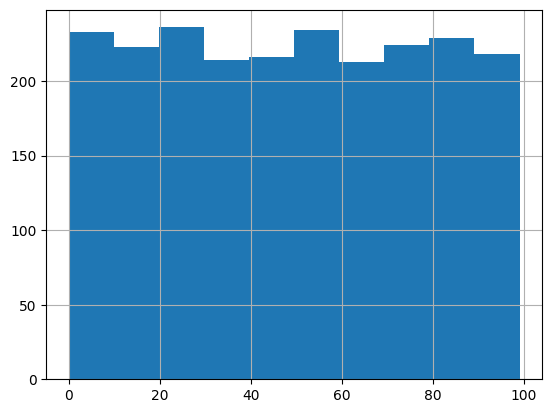

In [ ]:
#16. Recency

import scipy.stats as stats

# Assuming 'Recency' follows an exponential distribution
data['Recency'].hist()  # Plot a histogram to visualize the distribution

# Check for skewness or assess the shape of the distribution

# Assuming it is exponentially distributed:
lambda_recency = 1 / data['Recency'].mean()  # Calculate the rate parameter (λ) from the mean

# Define a threshold (example)
threshold = 30

# Calculate the probability of recency being less than 'threshold'
probability_recency = stats.expon.cdf(threshold, scale=1 / lambda_recency)
expected_recency = 1 / lambda_recency

print(f"Probability of recency less than {threshold} days: {probability_recency:.4f}")
print(f"Expected recency: {expected_recency:.2f}")


In [ ]:
#17. Income

# Define the parameters
mean_income = data['Income'].mean()
std_deviation_income = data['Income'].std()
lower_limit = 30000  # Example: Lower limit of income range
upper_limit = 60000  # Example: Upper limit of income range

# Calculate the probability P(lower_limit <= X <= upper_limit)
probability_range = stats.norm.cdf(upper_limit, loc=mean_income, scale=std_deviation_income) - stats.norm.cdf(lower_limit, loc=mean_income, scale=std_deviation_income)

print(f"Probability of Income between ${lower_limit} and ${upper_limit}: {probability_range:.4f}")
print(f"Expected Income: {mean_income:.2f}")


Probability of Income between $30000 and $60000: 0.4345
Expected Income: 52237.98


In [ ]:
#18. Response

# Calculate the proportion of customers who accepted the offer (probability of success)
p_success = data['Response'].mean()

# Expected number of customers who accepted the offer (same as the probability for a binary variable)
expected_response = p_success

print(f"Probability of a customer accepting the offer: {p_success:.4f}")
print(f"Expected number of customers who accepted the offer: {expected_response:.2f}")


Probability of a customer accepting the offer: 0.1491
Expected number of customers who accepted the offer: 0.15


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

# Conclusion:

###Customer Complaints:

The probability of a customer complaining is relatively low (0.0094), and the expected number of complaints is also low (0.01). This suggests that the company has a relatively low complaint rate, which is a positive indicator of customer satisfaction.

###Deal Purchases:
The probability of making 1 deal purchase is around 0.2273, and the expected number of deals is 2.33. This indicates that a significant portion of customers make at least one deal purchase, which can be leveraged for targeted marketing and promotions.

###Number of Kids and Teenagers at Home:
The probability of having 2 kids at home is 0.0633, and the expected number of kids at home is 0.44. Similarly, the probability of having 2 teenagers at home is 0.0772, with an expected number of 0.51. This provides insights into the family composition of customers.

###Catalog and Store Purchases:

The probability of making 4 purchases from a catalog is 0.1461, and the expected number of catalog purchases is 2.66. Additionally, the probability of making 10 purchases directly in stores is 0.0357, with an expected number of 5.79. Understanding preferred purchasing channels can guide marketing strategies.

###Web Purchases:

The probability of making 1 purchase from the website is 0.0687, with an expected number of 4.08. This highlights the significance of the online channel in customer behavior.

###Age Distribution:
The probability of an age between 1900 and 1944 is 0.0192, with an expected age of 1968.81. Understanding the age distribution helps tailor products and marketing to different age groups.

###Spending on Product Categories:

Probabilities and expected values for spending on various product categories (fish, meat, fruits, sweet, wine, and gold) provide insights into customer preferences and can inform product stocking and promotions.

###Web Visits:

The probability of 10 web visits in a month is 0.0244, with an expected number of 5.32. This highlights the importance of maintaining an engaging online presence.

###Recency and Income:

The probability of recency less than 30 days is 0.4571, with an expected recency of 49.11. The probability of income between $30,000 and $60,000 is 0.4345, with an expected income of $52,237.98. These factors are essential for customer targeting and retention.

###Response to Offers:

The probability of a customer accepting the offer is 0.1491, and the expected number of customers who accepted the offer is 0.15. Understanding customer responses to offers is crucial for campaign effectiveness.
Recommendations:

# Based on the insights gained, here are some recommendations for the company:

###Customer Complaints:

Continue efforts to maintain a low complaint rate by providing excellent customer service.

###Deal Purchases:

Leverage the high probability of customers making at least one deal purchase for targeted marketing and promotions.

###Family Composition:

Tailor products and offers to suit families with both children and teenagers at home.

###Purchasing Channels:

Optimize marketing strategies for both catalog and store purchases, recognizing their importance. Ensure an appealing online presence for web purchases.

###Age-Based Targeting:

Segment marketing campaigns based on age groups to better address customer preferences and needs.

###Product Categories:

Promote popular product categories while considering the variance in spending on different items.

###Web Engagement:

Maintain a dynamic website to encourage customer engagement.

###Recency and Income:

Focus on retaining recently active customers and tailor offers based on their income level.

###Campaign Effectiveness:

Continuously monitor and analyze customer responses to offers to refine future campaigns.







## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍